## TED talks task

In this notebook, I will show some exploratory data analisys and modelling of the TED talks dataset: https://www.kaggle.com/rounakbanik/ted-talks.  

# 1.  Exploratory data analisys

The purpose of this exploration will be primary to answer the questions: 
    - What are the most popular talks? 
    - Is there a correlation between views, numbers, ratings etc? 
    - What are the most popular topics? 

In [489]:
import pandas as pd 
import numpy as np 

In [490]:
df_talks = pd.read_csv("ted_main.csv")
df_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [370]:
df_talks.shape

(2550, 17)

## Comments 

In [371]:
df_talks.comments.describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

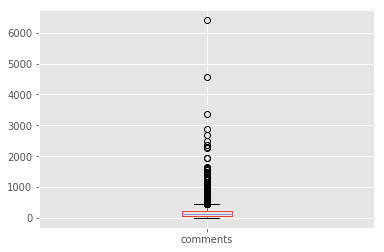

In [372]:
df_talks.boxplot(column='comments')

Comments of most talks are centered around 200; however, there are some videos that are extrimely popular. Let's see who are they. 

In [373]:
df_popular = df_talks[df_talks.comments > 2000]
df_popular[["name", "comments"]]

,name,comments
0,Ken Robinson: Do schools kill creativity?,4553
96,Richard Dawkins: Militant atheism,6404
201,Jill Bolte Taylor: My stroke of insight,2877
644,Sam Harris: Science can answer moral questions,3356
661,Michael Specter: The danger of science denial,2272
840,Lesley Hazleton: On reading the Koran,2374
954,Janet Echelman: Taking imagination seriously,2492
1346,Amy Cuddy: Your body language may shape who yo...,2290
1787,David Chalmers: How do you explain consciousness?,2673


From this, we could expect topicts such as religion, science and creativity will be among the top ones. 

## Views

In [374]:
df_talks.views.describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

Here the variation is much bigger. 

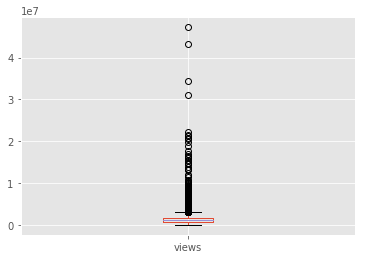

In [375]:
df_talks.boxplot(column='views')

Again, few videos are outliers. 

In [376]:
df_pop2 = df_talks[df_talks.views > 30000000]
df_pop2[["name", "views"]]

,name,views
0,Ken Robinson: Do schools kill creativity?,47227110
677,Simon Sinek: How great leaders inspire action,34309432
837,Brené Brown: The power of vulnerability,31168150
1346,Amy Cuddy: Your body language may shape who yo...,43155405


#### Correlation
Is there correlation between number of views and number of comments?       
To explore this, we will first remove outliers. 

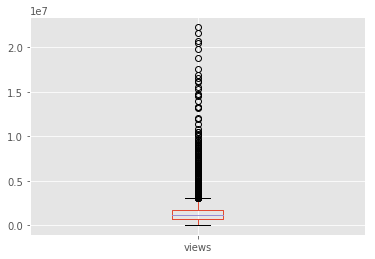

In [377]:
df_cleaned = df_talks[df_talks.views < 30000000]
df_cleaned = df_cleaned[df_cleaned.comments <= 2000]
df_cleaned.boxplot(column=['views'])

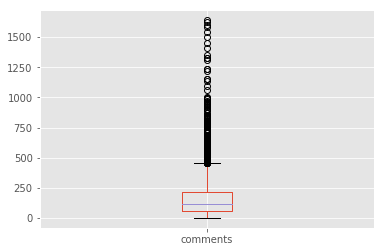

In [378]:
df_cleaned.boxplot(column=['comments'])

In [379]:
comments = np.array(df_cleaned.comments)
views = np.array(df_cleaned.views)

np.corrcoef(comments, views)

array([[1.       , 0.4953678],
       [0.4953678, 1.       ]])

The correcation coefficient of 0.5 show us there is a weak linear correletion between the two variables. Ths can also be seen at a scatter plot:     

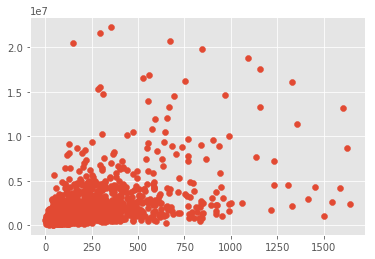

In [380]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(comments, views)
plt.show()

## Ratings 

In [499]:
#Code from: https://www.kaggle.com/rounakbanik/ted-talks 
df_talks['ratings']=df_talks['ratings'].str.replace("'",'"')
df_talks=df_talks.merge(df_talks.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])), 
            left_index=True, right_index=True)

In [500]:
df_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,110,72,5433,4606,67,2542,3736,248,61,2893


We have 14 new columns, that respod to 14 categories of ratings.

In [501]:
categories = ['Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']

In [502]:
df_talks["total_ratings"] = np.zeros(df_talks.shape[0])
for col in categories:
    df_talks[TOTAL_RATINGS] += df_talks[col]

In [503]:
df_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [504]:
df_talks.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'total_ratings', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring'],
      dtype='object')

We would explore the correlations between the numerical values in the dataset. In rder to have simpler visualization, we will use onlu the total number of ratings. 

In [505]:
#NUmerical columns
num_cols = ['comments', 'duration',
       'languages', 'num_speaker', 'views', 
       'total_ratings']

In [506]:
df_num = df_talks[num_cols]

In [507]:
df_num.head()

,comments,duration,languages,num_speaker,views,total_ratings
0,4553,1164,60,1,47227110,93850.0
1,265,977,43,1,3200520,2936.0
2,124,1286,26,1,1636292,2824.0
3,200,1116,35,1,1697550,3728.0
4,593,1190,48,1,12005869,25620.0


In [508]:
df_num.corr()

,comments,duration,languages,num_speaker,views,total_ratings
comments,1.000000,0.140694,0.318284,-0.035489,0.530939,0.644329
duration,0.140694,1.000000,-0.295681,0.022257,0.048740,0.098311
languages,0.318284,-0.295681,1.000000,-0.063100,0.377623,0.338101
num_speaker,-0.035489,0.022257,-0.063100,1.000000,-0.026389,-0.039488
views,0.530939,0.048740,0.377623,-0.026389,1.000000,0.865586
total_ratings,0.644329,0.098311,0.338101,-0.039488,0.865586,1.000000


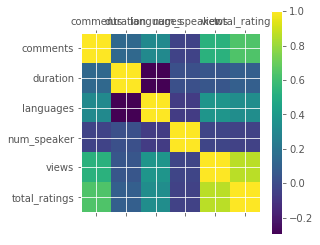

<Figure size 1440x1440 with 0 Axes>

In [509]:
plt.matshow(df_num.corr())
plt.xticks(range(len(df_num.columns)), df_num.columns)
plt.yticks(range(len(df_num.columns)), df_num.columns)
plt.colorbar()
plt.figure(figsize=(20,20))
plt.show()

We can see that number of ratings is much more correlated number of comments, than numnber of views. 

## TAGS 

Finally, we will explore what are the most widely use tags.

In [510]:
#format tags as list of strings
df_talks["tags"] = df_talks["tags"].str.replace("[",'').str.replace("]",'').str.replace("'",'').str.split(", ")

In [511]:
df_talks.tags[0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [512]:
df_tags = df_talks['tags'].str.join(sep='*').str.get_dummies(sep='*')

In [513]:
df_tags.head()

,"""Alzheimers""",3d printing,AI,AIDS,Addiction,Africa,Anthropocene,Asia,Autism spectrum disorder,Bioethics,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Top 20 most popular tags
df_tags.sum().sort_values(ascending=False)[0:20]

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
society          224
art              221
social change    218
future           195
communication    191
creativity       189
biology          189
humanity         182
collaboration    174
environment      165
dtype: int64

We can see that science is overall the most popular topic.  

# 2. Modelling 

The taks that we will solve is to predict the number of comments of a talk, based on the features that we already have. 
This is a regression task, so for baseline we will use linear regression. 
Since the number of examles is relatively small (2550), we will stick to traditional machine learning models and not dive into deep learning. 

## Baseline - linear regression 

For baseline we will use linear regression with the numerical features we have in our dataset. 

For the linear regression, we will have some significant correlation (> 0.20 absolut value) with the target variable.  

In [539]:
#1. Linear regression 

num_cols = ['comments', 'duration',
       'languages', 'num_speaker', 'views', 
       'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring',
#        'total_ratings' #it is sum of the other variables.
           ]

In [540]:
df_cleaned = df_talks[df_talks.views < 30000000]
df_cleaned = df_cleaned[df_cleaned.comments <= 2000]

In [541]:
df_cleaned.comments.describe()

count    2539.000000
mean      179.336747
std       195.457376
min         2.000000
25%        63.000000
50%       117.000000
75%       219.000000
max      1640.000000
Name: comments, dtype: float64

In [542]:
df_num = df_cleaned[num_cols]
df_num.head()

,comments,duration,languages,num_speaker,views,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
1,265,977,43,1,3200520,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,124,1286,26,1,1636292,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,200,1116,35,1,1697550,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,593,1190,48,1,12005869,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
5,672,1305,36,1,20685401,1102,706,397,721,285,301,1038,1350,377,2423,669,441,335,5211


In [543]:
df_corr = df_num[df_num.columns[:]].corr()

In [544]:
#Vizualization of correlation matrix. I took the style from stack overflow. 
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,comments,duration,languages,num_speaker,views,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
comments,1,0.14,0.36,-0.043,0.5,0.23,0.33,0.37,0.48,0.38,0.34,0.47,0.48,0.42,0.62,0.27,0.44,0.36,0.52
duration,0.14,1,-0.31,0.023,0.029,-0.016,0.014,-0.011,0.098,0.3,0.072,0.11,0.12,0.015,0.13,0.028,-0.11,0.044,0.085
languages,0.36,-0.31,1,-0.063,0.4,0.23,0.21,0.26,0.19,0.12,0.16,0.32,0.3,0.18,0.29,0.13,0.43,0.11,0.28
num_speaker,-0.043,0.023,-0.063,1,-0.029,-0.022,-0.003,-0.024,-0.037,-0.053,-0.023,-0.062,-0.039,-0.033,-0.06,-0.0058,-0.047,-0.0089,-0.042
views,0.5,0.029,0.4,-0.029,1,0.53,0.45,0.49,0.42,0.33,0.35,0.65,0.69,0.22,0.58,0.35,0.61,0.21,0.62
Funny,0.23,-0.016,0.23,-0.022,0.53,1,0.18,0.41,0.14,0.21,0.22,0.29,0.35,0.12,0.32,0.13,0.38,0.21,0.33
Beautiful,0.33,0.014,0.21,-0.003,0.45,0.18,1,0.21,0.44,0.18,0.14,0.24,0.47,0.059,0.29,0.28,0.27,0.093,0.65
Ingenious,0.37,-0.011,0.26,-0.024,0.49,0.41,0.21,1,0.11,0.16,0.21,0.4,0.65,0.093,0.34,0.56,0.3,0.1,0.37
Courageous,0.48,0.098,0.19,-0.037,0.42,0.14,0.44,0.11,1,0.18,0.13,0.28,0.22,0.13,0.45,0.11,0.24,0.17,0.61
Longwinded,0.38,0.3,0.12,-0.053,0.33,0.21,0.18,0.16,0.18,1,0.6,0.29,0.3,0.48,0.35,0.11,0.57,0.49,0.28


In [545]:
df_num[df_num.columns[:]].corr()['comments'][:].sort_values(ascending=False)

comments        1.000000
Persuasive      0.619576
Inspiring       0.520158
views           0.495368
Fascinating     0.484291
Courageous      0.483843
Informative     0.474869
OK              0.437800
Unconvincing    0.418801
Longwinded      0.380731
Ingenious       0.372417
Obnoxious       0.360064
languages       0.356117
Confusing       0.339495
Beautiful       0.325395
Jaw-dropping    0.269445
Funny           0.226832
duration        0.139437
num_speaker    -0.042848
Name: comments, dtype: float64

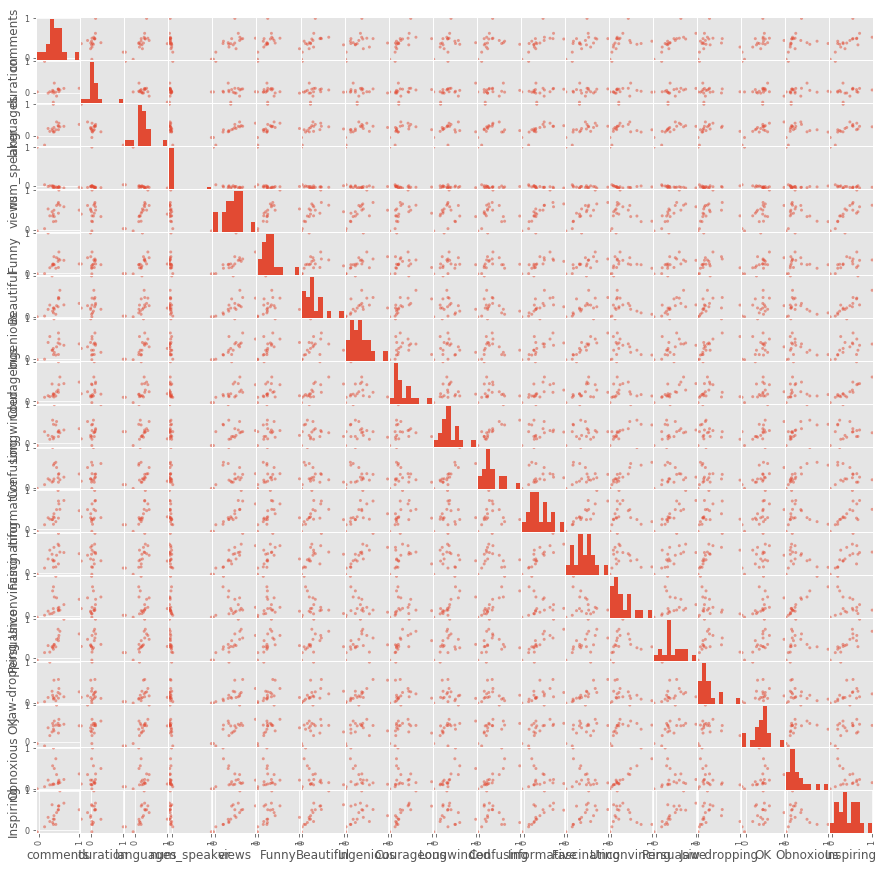

In [546]:
pd.plotting.scatter_matrix(pd.DataFrame(df_corr), figsize=(15, 15))
plt.show()

### Variables transformation

When we look an the first line of the graphic, we can see that for most features, there is no linear dependence between them and the target variable (comments). 
We will try logarithmic transfromation to improve correlation. 

In [547]:
feature_cols = df_num.columns[1:]
for col_name in feature_cols:
    new_col = col_name + "_log"
    df_num[new_col] = df_num[col_name].apply(lambda x: np.log(x+1))

C:\Users\melania\Anaconda3\envs\recommendation-systems\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [548]:
df_num.head()

,comments,duration,languages,num_speaker,views,Funny,Beautiful,Ingenious,Courageous,Longwinded,...,Longwinded_log,Confusing_log,Informative_log,Fascinating_log,Unconvincing_log,Persuasive_log,Jaw-dropping_log,OK_log,Obnoxious_log,Inspiring_log
1,265,977,43,1,3200520,544,58,56,139,113,...,4.736198,4.143135,6.095825,4.890349,5.556828,5.594711,4.762174,5.318120,4.882802,6.025866
2,124,1286,26,1,1636292,964,60,183,45,78,...,4.369448,3.332205,5.981414,5.117994,4.653960,5.442418,4.007333,4.990433,4.962845,5.442418
3,200,1116,35,1,1697550,59,291,105,760,53,...,3.988984,3.496508,5.942799,4.890349,3.610918,6.133398,5.442418,4.454347,3.583519,6.976348
4,593,1190,48,1,12005869,1390,942,3202,318,110,...,4.709530,4.290459,8.600431,8.435332,4.219508,7.841100,8.226038,5.517453,4.127134,7.970395
5,672,1305,36,1,20685401,1102,706,397,721,285,...,5.655992,5.710427,6.946014,7.208600,5.934894,7.793174,6.507278,6.091310,5.817111,8.558719


In [549]:
df_num[df_num.columns[:]].corr()['comments'][:].sort_values(ascending=False)

comments            1.000000
Persuasive          0.619576
Persuasive_log      0.560637
Inspiring           0.520158
Inspiring_log       0.496620
views               0.495368
Jaw-dropping_log    0.493447
views_log           0.487538
Unconvincing_log    0.484398
Fascinating         0.484291
Courageous          0.483843
Obnoxious_log       0.480304
Informative         0.474869
Fascinating_log     0.468986
Courageous_log      0.467768
OK                  0.437800
Unconvincing        0.418801
Informative_log     0.413308
OK_log              0.407264
Confusing_log       0.406115
Longwinded          0.380731
Longwinded_log      0.378364
Ingenious           0.372417
Ingenious_log       0.362920
Obnoxious           0.360064
languages           0.356117
Confusing           0.339495
Beautiful           0.325395
Funny_log           0.293453
Beautiful_log       0.270965
Jaw-dropping        0.269445
Funny               0.226832
languages_log       0.186115
duration            0.139437
duration_log  

Now we have a slightly better correlating variables. We will remove the least significant features. 

In [556]:
df_sel = df_num.drop(columns=['duration', 'duration_log', 'num_speaker', 'num_speaker_log'])
df_sel.columns

Index(['comments', 'languages', 'views', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'languages_log', 'views_log', 'Funny_log', 'Beautiful_log',
       'Ingenious_log', 'Courageous_log', 'Longwinded_log', 'Confusing_log',
       'Informative_log', 'Fascinating_log', 'Unconvincing_log',
       'Persuasive_log', 'Jaw-dropping_log', 'OK_log', 'Obnoxious_log',
       'Inspiring_log'],
      dtype='object')

In [557]:
y = np.array(df_sel[:]['comments']).reshape(-1, 1)
X = np.array(df_sel.drop(columns =['comments']))

In [558]:
print(y.shape)
print(X.shape)

(2539, 1)
(2539, 32)


In [559]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [560]:
X_train.shape

(1904, 32)

In [561]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [562]:
y_pred = reg.predict(X_test)

In [563]:
#Show predictions
y_test = y_test.flatten()
y_pred = y_pred.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,150,157.556393
1,65,50.193777
2,69,85.669457
3,93,193.884764
4,17,75.022101
5,74,93.109275
6,72,24.812900
7,368,293.214418
8,208,75.639009
9,795,680.957076


In [564]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70.55039367264884
Mean Squared Error: 12737.92386033724
Root Mean Squared Error: 112.86241119317467


We were able to decrease MAE by 5 points by having logarithmic features. 
Results are not very good, which is expectable as the features are quite correlated. We will try to imporve the prediction with adding regularization. For that, we will use Ridge Regression, which uses L2 regularization in the loss function. 

In [565]:
#Ridge regression. 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [566]:
y_pred = ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70.54612099963951
Mean Squared Error: 12738.58801775211
Root Mean Squared Error: 112.86535348702945


 There is no significant improvement. Now we are going to try Lasso regression, which uses L1 regularization. 

In [567]:
#Lasso regression. Alpha is the coefficient of L1 term 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.8, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [568]:
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70.18405881100638
Mean Squared Error: 12826.82400691586
Root Mean Squared Error: 113.2555694300102


There is a slight improvement, from 70.55 to 70.18, but it's still not satisfactory. We will now try using polinomial regression. 

In [569]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
# X_ = poly.fit_transform(X)
# predict_ = poly.fit_transform(predicf)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
reg = linear_model.LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [570]:
# Test results 
y_pred = reg.predict(X_test_poly)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 165.03592116061532
Mean Squared Error: 319878.07927439496
Root Mean Squared Error: 565.5776509679241


In [571]:
#Train results
y_pred = reg.predict(X_train_poly)
print('Mean Absolute Error train set:', metrics.mean_absolute_error(y_train, y_pred)) 

Mean Absolute Error train set: 52.790828718979974


We can see that the polinomial function is quite overfitting.

## Regression trees

In [572]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.62834645669291
Mean Squared Error: 27309.07874015748
Root Mean Squared Error: 165.254587652378


In [573]:
# With parameter tunning - best results with this features come when we select up to 14 features and use depth of 6. 
reg = DecisionTreeRegressor(random_state=0, max_depth =6, max_features=14)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 85.24100330163846
Mean Squared Error: 21948.097940266227
Root Mean Squared Error: 148.14890462054123


In [574]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, max_features=16, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 69.13695685607878
Mean Squared Error: 12947.789991818117
Root Mean Squared Error: 113.78835613461563


C:\Users\melania\Anaconda3\envs\recommendation-systems\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\melania\Anaconda3\envs\recommendation-systems\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


We were able to slightly improve linear regression. 

# Averaging
Finally, lets try to average RandomForest and Lasso regression. 

In [575]:
y_pred_l = lasso.predict(X_test).flatten()
y_pred_r = regr.predict(X_test).flatten()

In [576]:
y_pred_ = y_pred.flatten()
df = pd.DataFrame({'Actual': y_test,
                   'Predicted_Lasso': y_pred_l,
                   'Predicted_RF': y_pred_r,}
                 )
df.head(10)

,Actual,Predicted_Lasso,Predicted_RF
0,150,152.885011,133.035823
1,65,47.470856,91.668639
2,69,80.367783,85.359796
3,93,188.544506,103.727292
4,17,51.348149,54.247553
5,74,92.811496,98.887428
6,72,26.146351,50.652068
7,368,282.694960,285.861337
8,208,79.681353,106.005955
9,795,664.635346,764.657632


In [ ]:
df['Predicted'] = (df['Predicted_Lasso'] + df['Predicted_RF']) / 2
df.head()

In [ ]:
y_pred = np.array(df['Predicted']).reshape(-1, 1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

We were able to decrease MAE by 10 points (13%) comparing to linear regression with no transformations. 

## Some things that did not work 

Here, I will include experiments that did not lead to improvement. 

### Adding tags 
As all the tags are 416 and the matrix is quite sparse, as I expected they did not ead to better prediction. 

In [ ]:
## Adding tags variables
df_cleaned["tags"] = df_cleaned["tags"].str.replace("[",'').str.replace("]",'').str.replace("'",'').str.split(", ")
df_cleaned["tags"][1]

In [ ]:
df_tags = df_cleaned['tags'].str.join(sep='*').str.get_dummies(sep='*')
df_tags.head()
df_new = pd.concat([df_num, df_tags],axis=1)

In [ ]:
df_new.head(2)

In [ ]:
y = np.array(df_new[:]['comments']).reshape(-1, 1)
X = np.array(df_new.drop(columns =['comments']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

### Nearest neighbors regression

Nearest neighbors regression did not perform good on the data so far. 

In [ ]:
## Nearest neighbors regression
from sklearn import neighbors
for n_neighbors in range(40, 50):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights="distance")
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

## Future work

I tried to fit myself in around 10 hours of concentrated work, so I did not have the time to do the following things: 

- Transofrm "film_date" to dates and then from dates to discrete variable in the interval [0, max_date], if possible. 
- Same with "published_date". 
- Transform "event" from categorical to numerical variable. 
- Try ExtraTrees and Boosting for regression
- Use Kfold validation instead of test/train split, as data is too small. 
- More feature selection.